<a href="https://colab.research.google.com/github/anisfreelancer71/mycode/blob/main/DEEP_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Langkah pertama dalam memulai proyek deep learning setelah mengimpor library yang diperlukan adalah mempersiapkan data dan membangun model deep learning. Berikut langkah-langkah selanjutnya yang biasanya diambil:

#1. Persiapkan Data:

Baca data Anda jika data sudah tersedia dalam format tertentu (misalnya, CSV).
Lakukan eksplorasi awal terhadap data untuk memahami karakteristiknya.
Bagi data menjadi data pelatihan (train) dan data pengujian (test) menggunakan train_test_split dari scikit-learn.
Normalisasi atau standarisasi data jika diperlukan. Biasanya, data numerik akan dinormalisasi ke rentang [0, 1] atau di-standarisasi (z-score) agar memiliki mean 0 dan variansi 1.
#2. Buat Model Deep Learning:

Tentukan arsitektur model deep learning Anda. Ini termasuk menentukan jumlah lapisan (layers), jumlah neuron dalam setiap lapisan, dan fungsi aktivasi yang akan digunakan.
Gunakan TensorFlow atau Keras untuk membuat dan mendefinisikan model. Keras adalah API yang terintegrasi dengan TensorFlow sehingga Anda dapat menggunakannya dengan TensorFlow.
Tentukan fungsi kerugian (loss function) yang akan digunakan untuk melatih model Anda. Pilih juga algoritma optimisasi seperti Adam atau SGD.
#3. Latih Model:

Gunakan data pelatihan yang telah Anda persiapkan untuk melatih model Anda. Ini dilakukan dengan menggunakan metode .fit() pada model Anda.
Selama pelatihan, model akan menyesuaikan bobotnya untuk mengurangi nilai fungsi kerugian. Anda perlu menentukan jumlah epoch (siklus pelatihan) dan ukuran batch (jumlah data yang digunakan dalam satu iterasi pelatihan).
#4. Evaluasi Model:

Setelah pelatihan selesai, gunakan data pengujian untuk mengukur kinerja model. Anda dapat menggunakan metrik seperti akurasi (accuracy), presisi (precision), recall, F1-score, dan lainnya sesuai dengan jenis masalah yang Anda hadapi.
Gunakan predict() atau predict_proba() untuk membuat prediksi menggunakan model yang telah dilatih.
#5. Tuning dan Evaluasi Lebih Lanjut:

Jika kinerja model belum memuaskan, Anda dapat melakukan tuning hyperparameter seperti mengubah tingkat pembelajaran atau mengatur jumlah lapisan dan neuron dalam model.
Lakukan evaluasi lebih lanjut dan analisis kesalahan untuk memahami di mana model Anda dapat ditingkatkan.
#6. Implementasi:

Setelah Anda memiliki model deep learning yang baik, Anda dapat mengimplementasikannya dalam aplikasi atau sistem yang sesuai dengan tujuan Anda.
#7. Monitoring dan Pemeliharaan:

Proyek deep learning biasanya memerlukan pemeliharaan dan pemantauan terus-menerus, terutama jika model Anda digunakan secara langsung dalam produksi.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drvie')

Drive already mounted at /content/drvie; to attempt to forcibly remount, call drive.mount("/content/drvie", force_remount=True).


In [ ]:
!ls '/content/drvie/My Drive/filecsv'

 creditcard.csv		       'Sales_June_2019 (1).csv'
 data_harga_rumah.csv	        Sales_June_2019.csv
'Financials (1).csv'	       'Sales_March_2019 (1).csv'
'Financials (2).csv'	        Sales_March_2019.csv
'Financials (3).csv'	       'Sales_May_2019 (1).csv'
 Financials.csv		       'Sales_May_2019 (2).csv'
 lc_2016_2017.csv	        Sales_May_2019.csv
 Sales_April_2019.csv	       'Sales_November_2019 (1).csv'
 Sales_August_2019.csv	        Sales_November_2019.csv
'Sales_December_2019 (1).csv'  'Sales_October_2019 (1).csv'
 Sales_December_2019.csv       'Sales_October_2019 (2).csv'
 Sales_February_2019.csv        Sales_October_2019.csv
'Sales_January_2019 (1).csv'    Sales_September_2019.csv
 Sales_January_2019.csv         shopping_data.csv
 Sales_July_2019.csv


In [ ]:
data1 = pd.read_csv('/content/drvie/My Drive/filecsv/lc_2016_2017.csv')
data2 = pd.read_csv('/content/drvie/My Drive/filecsv/creditcard.csv')
data_gab = pd.concat([data1, data2], ignore_index=True)
dplrn_df = pd.DataFrame(data_gab)

print(f'Jumlah data1:', data1.shape)
print(f'Jumlah data2:', data2.shape)
print(f'Jumlah dplrn_df:', dplrn_df.shape)

Jumlah data1: (117587, 72)
Jumlah data2: (178374, 31)
Jumlah dplrn_df: (295961, 103)


In [ ]:
print(f'DataGab :', dplrn_df.describe())

DataGab :                  id  member_id      loan_amnt    funded_amnt  funded_amnt_inv  \
count  1.175870e+05        0.0  117587.000000  117587.000000    117587.000000   
mean   1.075454e+08        NaN   14579.725437   14579.725437     14575.849796   
std    3.445693e+06        NaN    9469.547007    9469.547007      9466.907125   
min    6.871190e+05        NaN    1000.000000    1000.000000      1000.000000   
25%    1.051123e+08        NaN    7000.000000    7000.000000      7000.000000   
50%    1.076967e+08        NaN   12000.000000   12000.000000     12000.000000   
75%    1.100619e+08        NaN   20000.000000   20000.000000     20000.000000   
max    1.124413e+08        NaN   40000.000000   40000.000000     40000.000000   

            int_rate    installment    annual_inc  desc           dti  ...  \
count  117587.000000  117587.000000  1.175870e+05   0.0  117503.00000  ...   
mean       13.263085     436.729773  8.063943e+04   NaN      18.93802  ...   
std         5.139135     2

In [ ]:
print(f'DataHilang :', dplrn_df.isnull().sum())

DataHilang : id                 178374
member_id          295961
loan_amnt          178374
funded_amnt        178374
funded_amnt_inv    178374
                    ...  
V26                117588
V27                117588
V28                117588
Amount             117588
Class              117588
Length: 103, dtype: int64


In [ ]:
kolom_nan = dplrn_df.columns[dplrn_df.isna().any()].tolist()
print("Kolom dengan nilai NaN:")
print(kolom_nan)


Kolom dengan nilai NaN:
['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_12m', 'open

In [ ]:
# Tentukan ambang batas persentase nilai NaN yang diizinkan
threshold = 0.5

# Hitung jumlah nilai NaN dalam setiap kolom
nan_count = dplrn_df.isna().sum()

# Dapatkan daftar kolom yang melebihi ambang batas persentase
kolom_nan_lebih_dari_threshold = nan_count[nan_count / len(dplrn_df) > threshold].index.tolist()

# Hapus kolom-kolom tersebut dari DataFrame
dplrn_df = dplrn_df.drop(columns=kolom_nan_lebih_dari_threshold)

# Tampilkan informasi tentang DataFrame setelah penghapusan
print(f"Jumlah kolom setelah penghapusan: {dplrn_df.shape[1]}")


Jumlah kolom setelah penghapusan: 31


In [ ]:
print(f'Jumlah kolom setelah penghapusan: 31:' , dplrn_df.describe)

Jumlah kolom setelah penghapusan: 31: <bound method NDFrame.describe of             Time        V1        V2        V3        V4        V5        V6  \
0            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...          ...       ...       ...       ...       ...       ...       ...   
295956  123600.0 -1.219464  0.962818  1.744757  2.001335  0.734260  0.680222   
295957  123601.0  1.850317 -0.317701 -2.150051 -0.035828  1.125086  1.255451   
295958  123601.0 -0.862352  0.505851  1.501963 -0.784297 -0.040316  0.745872   
295959  123601.0  2.041131  0.026675 -1.779920  0.678691  0.166084 -1.702445   
295960  123602.0  1.619240 -1.505770 -0.465645 -

In [ ]:
# Mengisi nilai NaN dengan nilai rata-rata kolom numerik
dplrn_df.fillna(dplrn_df.mean(), inplace=True)

# Memeriksa apakah masih ada nilai NaN
print("Jumlah nilai NaN setelah pengisian:", dplrn_df.isna().sum().sum())


Jumlah nilai NaN setelah pengisian: 0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dplrn_df['Amount'] = scaler.fit_transform(dplrn_df['Amount'].values.reshape(-1, 1))


In [ ]:
# Menghapus kolom 'Time'
dplrn_df = dplrn_df.drop(columns=['Time'])

# Memeriksa jumlah kolom setelah penghapusan
print("Jumlah kolom setelah penghapusan:", dplrn_df.shape[1])


Jumlah kolom setelah penghapusan: 30


In [ ]:
# Memisahkan fitur X dan target y
X = dplrn_df.drop(columns=['Class'])  # Menghapus kolom 'Class' dari fitur X
y = dplrn_df['Class']  # Menggunakan kolom 'Class' sebagai target y

# Memeriksa dimensi dari X dan y
print("Dimensi X:", X.shape)
print("Dimensi y:", y.shape)


Dimensi X: (295961, 29)
Dimensi y: (295961,)


In [ ]:
from sklearn.model_selection import train_test_split

# Bagi dataset Anda menjadi data pelatihan dan data uji (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bagi data pelatihan lagi menjadi data pelatihan dan data validasi
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Sekarang Anda memiliki X_train, y_train untuk pelatihan,
# X_val, y_val untuk validasi, dan X_test, y_test untuk pengujian.


In [ ]:
# Buat model deep learning dengan satu lapisan tambahan
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),  # Lapisan tambahan
    layers.Dense(1, activation='sigmoid')
])

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Latih model Anda dan evaluasi hasilnya
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluasi akurasi pada data pengujian
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")


Epoch 1/10
5920/5920 [==============================] - 31s 5ms/step - loss: 0.0140 - accuracy: 0.6008 - val_loss: 0.0077 - val_accuracy: 0.6045
Epoch 2/10
5920/5920 [==============================] - 14s 2ms/step - loss: 0.0080 - accuracy: 0.6013 - val_loss: 0.0078 - val_accuracy: 0.6046
Epoch 3/10
5920/5920 [==============================] - 14s 2ms/step - loss: 0.0077 - accuracy: 0.6014 - val_loss: 0.0075 - val_accuracy: 0.6046
Epoch 4/10
5920/5920 [==============================] - 14s 2ms/step - loss: 0.0076 - accuracy: 0.6014 - val_loss: 0.0074 - val_accuracy: 0.6047
Epoch 5/10
5920/5920 [==============================] - 13s 2ms/step - loss: 0.0073 - accuracy: 0.6014 - val_loss: 0.0073 - val_accuracy: 0.6046
Epoch 6/10
5920/5920 [==============================] - 13s 2ms/step - loss: 0.0072 - accuracy: 0.6014 - val_loss: 0.0079 - val_accuracy: 0.6046
Epoch 7/10
5920/5920 [==============================] - 15s 3ms/step - loss: 0.0071 - accuracy: 0.6014 - val_loss: 0.0075 - val_ac

#2. Buat Model Deep Learning:

In [ ]:
# Split data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Buat model deep learning
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Latih model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluasi model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

Epoch 1/10
6475/6475 [==============================] - 19s 3ms/step - loss: 0.0121 - accuracy: 0.6017 - val_loss: 0.0080 - val_accuracy: 0.6028
Epoch 2/10
6475/6475 [==============================] - 17s 3ms/step - loss: 0.0080 - accuracy: 0.6020 - val_loss: 0.0079 - val_accuracy: 0.6028
Epoch 3/10
6475/6475 [==============================] - 17s 3ms/step - loss: 0.0077 - accuracy: 0.6020 - val_loss: 0.0080 - val_accuracy: 0.6027
Epoch 4/10
6475/6475 [==============================] - 16s 2ms/step - loss: 0.0075 - accuracy: 0.6021 - val_loss: 0.0080 - val_accuracy: 0.6028
Epoch 5/10
6475/6475 [==============================] - 17s 3ms/step - loss: 0.0074 - accuracy: 0.6021 - val_loss: 0.0080 - val_accuracy: 0.6027
Epoch 6/10
6475/6475 [==============================] - 17s 3ms/step - loss: 0.0073 - accuracy: 0.6021 - val_loss: 0.0080 - val_accuracy: 0.6028
Epoch 7/10
6475/6475 [==============================] - 17s 3ms/step - loss: 0.0072 - accuracy: 0.6021 - val_loss: 0.0086 - val_ac

#VISUALISASI MODEL

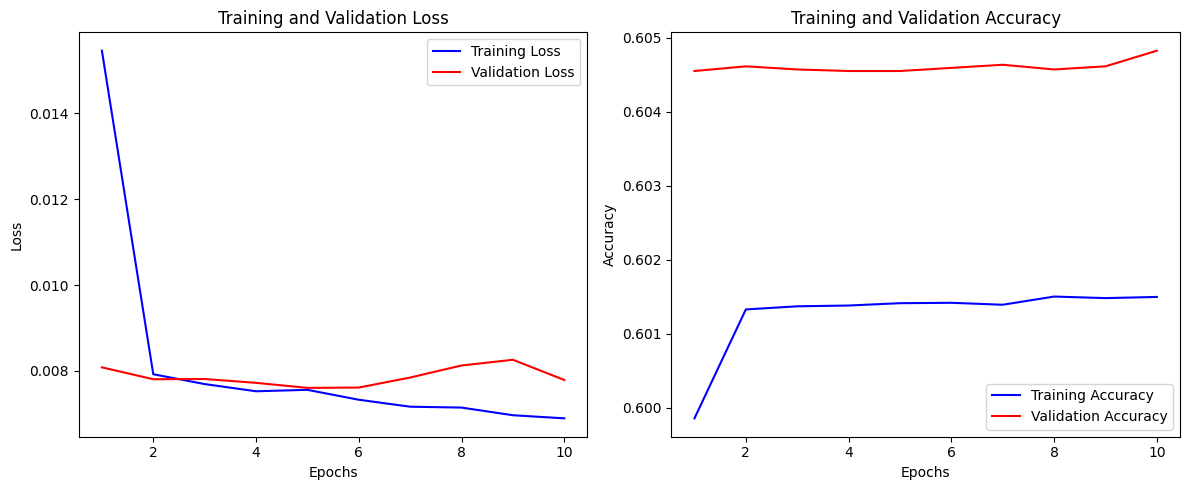

In [ ]:
import matplotlib.pyplot as plt

# Dapatkan metrik pelatihan dari objek history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
